In [1]:
# Importing required libraries and reading data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import tensorflow as tf

In [2]:
# Loading dataset
df=pd.read_csv("Signal.csv")
df.head(2)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [3]:
df.shape,df.size
# df.dtypes

((1599, 12), 19188)

In [4]:
# Checking missing values and percentage
missing_values = df.isnull().sum()/len(df)*100
print(missing_values)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


<AxesSubplot:>

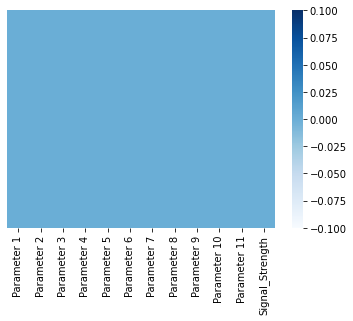

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='Blues')

In [6]:
# Checking presence of duplicate dataset
percentage = df.duplicated(keep=False).value_counts(normalize=True) * 100
print (percentage)

False    71.23202
True     28.76798
dtype: float64


In [7]:
df=df.drop_duplicates()

<AxesSubplot:ylabel='Signal_Strength'>

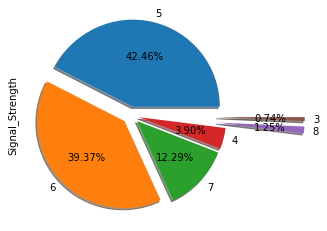

In [8]:
# Visualize distribution of target varialbles
def func(pct):
  return "{:1.2f}%".format(pct)

df['Signal_Strength'].value_counts().plot(kind='pie',autopct=lambda pct: func(pct), explode=[0.1,0.1,0.1,0.1,1,1],shadow=True)

<AxesSubplot:ylabel='Density'>

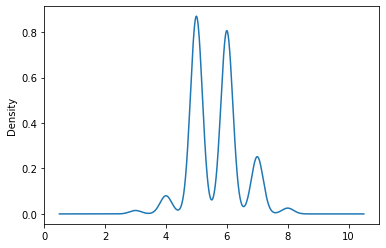

In [9]:
df['Signal_Strength'].plot.kde()

<AxesSubplot:ylabel='Frequency'>

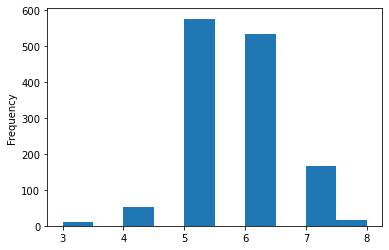

In [10]:
df['Signal_Strength'].plot.hist()

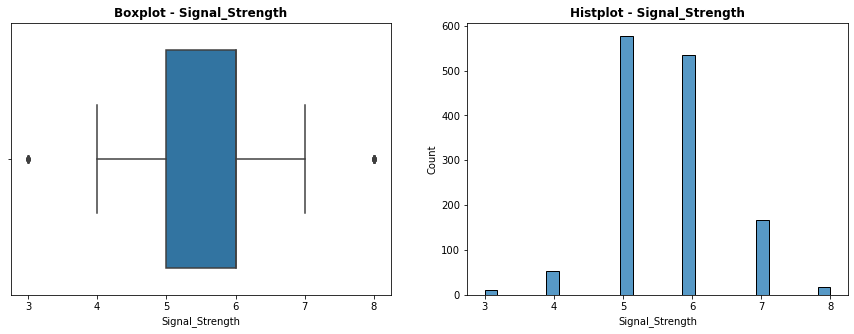

In [11]:
col = 'Signal_Strength'
x1 = df[col]

_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=x1, ax=ax[0]);
sns.histplot(x=x1, ax=ax[1]);
ax[0].set_title(f"Boxplot - {col}", fontweight='bold');
ax[1].set_title(f"Histplot - {col}", fontweight='bold');

The signal strength is max at 5th and 6th Parameter

While Parameter 3 and 8 are outliers

In [12]:
# Split the data into X & Y
X= df.drop(['Signal_Strength'], axis = 1)
Y = df['Signal_Strength']
print(X.shape,X.size)
print(Y.shape,Y.size)

(1359, 11) 14949
(1359,) 1359


In [13]:
# Splitting data into training & testing, 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.3, random_state =42)

In [14]:
# Checking the shape of of the training and testing dataset to be in sync
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(951, 11) (408, 11) (951,) (408,)


In [15]:
# Data normalization
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


In [16]:
# Transform labels into format acceptable by neural networks
label_encoder = OneHotEncoder(sparse=False)
Y_train=label_encoder.fit_transform(Y_train.to_frame())
Y_test=label_encoder.fit_transform(Y_test.to_frame())

In [17]:
# Design a neural network
model = Sequential([Input(shape=(11,)), 
                   Dense(512,activation='relu'), 
                   Dense(256,activation='relu'),
                   Dense(128,activation='relu'),
                   Dense(6,activation='softmax')])

In [18]:
# Description of model architecture 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6144      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
Total params: 171,142
Trainable params: 171,142
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [20]:
# Training the classifier
train = model.fit(X_train_sc, Y_train, epochs=50,batch_size=150, validation_data=(X_test_sc,Y_test))

Epoch 1/50
7/7 [==============================] - 0s 49ms/step - loss: 1.6707 - accuracy: 0.3617 - val_loss: 1.4424 - val_accuracy: 0.4216
Epoch 2/50
7/7 [==============================] - 0s 9ms/step - loss: 1.3414 - accuracy: 0.4259 - val_loss: 1.1974 - val_accuracy: 0.4363
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 1.2058 - accuracy: 0.5300 - val_loss: 1.1354 - val_accuracy: 0.5711
Epoch 4/50
7/7 [==============================] - 0s 9ms/step - loss: 1.1362 - accuracy: 0.5405 - val_loss: 1.0745 - val_accuracy: 0.5637
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 1.0723 - accuracy: 0.5447 - val_loss: 1.0346 - val_accuracy: 0.5907
Epoch 6/50
7/7 [==============================] - 0s 9ms/step - loss: 1.0451 - accuracy: 0.5626 - val_loss: 0.9948 - val_accuracy: 0.5784
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 1.0338 - accuracy: 0.5815 - val_loss: 0.9875 - val_accuracy: 0.5809
Epoch 8/50
7/7 [=================

Here we can clearly see that the loss is getting lower and accuracy is increasing. This depicts that everything is doing good in our model created.

Text(0.5, 1.0, 'Training and Validation Accuracy')

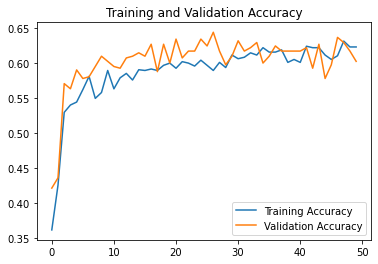

In [21]:
# Plotting of Training-Validation Accuracy of model
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'Training Accuracy' )
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

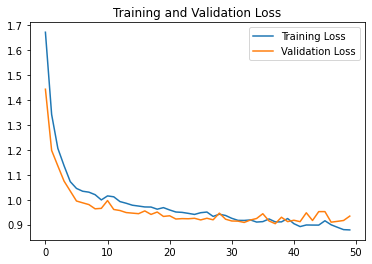

In [22]:
# Plotting of Training-Validation Loss of model
loss = train.history['loss']
val_loss = train.history['val_loss']

plt.plot(epochs, loss, label = 'Training Loss' )
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [23]:
# Model performance
scores = model.evaluate(X_test_sc, Y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.9342950582504272
Accuracy: 0.6029411554336548


In [24]:
# Classification Report of the model
Y_pred = model.predict(X_test_sc)
Y_pred=np.argmax(Y_pred, axis=1)
Y_test=np.argmax(Y_test, axis=1)
print("Test Classification Report",classification_report(Y_test,Y_pred))

Test Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        13
           2       0.69      0.63      0.66       172
           3       0.55      0.70      0.61       164
           4       0.57      0.46      0.51        50
           5       0.00      0.00      0.00         4

    accuracy                           0.60       408
   macro avg       0.30      0.30      0.30       408
weighted avg       0.58      0.60      0.59       408



Now, let's improve the model created so far for enhanced performance.

In [25]:
# Re-sampling the data
smote=SMOTE("minority")
X_res,Y_res = smote.fit_resample(X,Y)

In [26]:
X_res.shape,Y_res.shape

((1926, 11), (1926,))

In [27]:
# Checking the distribution of the resampled target class
pd.DataFrame(Y_res).value_counts(normalize=True)*100

Signal_Strength
3                  29.958463
5                  29.958463
6                  27.777778
7                   8.670820
4                   2.751817
8                   0.882658
dtype: float64

In [28]:
# Splitting the balanced data into train and test.
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_res,Y_res, test_size=0.30, random_state=42)
print(X_train1.shape,X_test1.shape)
print(Y_train1.shape,Y_test1.shape)

(1348, 11) (578, 11)
(1348,) (578,)


In [29]:
# Normalize the dataset
scaler = MinMaxScaler()
X_train_sc1 = scaler.fit_transform(X_train1)
X_test_sc1 = scaler.transform(X_test1)


In [30]:
# Formatting labels
label_encoder = OneHotEncoder(sparse=False)
Y_train1=label_encoder.fit_transform(Y_train1.to_frame())
Y_test1=label_encoder.fit_transform(Y_test1.to_frame())

In [31]:
# Upgrading our neural network model
model1 = Sequential([Input(shape=(11,)), 
                   Dense(512,activation='relu'),
                   Dense(256,activation='relu'), 
                   Dense(128,activation='relu'),
                   Dense(6,activation='softmax')])

In [32]:
# Description of upgraded model architecture 
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               6144      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 774       
Total params: 171,142
Trainable params: 171,142
Non-trainable params: 0
_________________________________________________________________


In [33]:
from tensorflow.keras.optimizers import Adam

model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [34]:
# Training the classifier
train1 = model1.fit(X_train_sc1, Y_train1, epochs=70,batch_size=100, validation_data=(X_test_sc1,Y_test1))

Epoch 1/70
14/14 [==============================] - 0s 33ms/step - loss: 1.5289 - accuracy: 0.4696 - val_loss: 1.2623 - val_accuracy: 0.5433
Epoch 2/70
14/14 [==============================] - 0s 16ms/step - loss: 1.2005 - accuracy: 0.5326 - val_loss: 1.0613 - val_accuracy: 0.5848
Epoch 3/70
14/14 [==============================] - 0s 10ms/step - loss: 1.0329 - accuracy: 0.5838 - val_loss: 0.9377 - val_accuracy: 0.6228
Epoch 4/70
14/14 [==============================] - 0s 8ms/step - loss: 0.9408 - accuracy: 0.6150 - val_loss: 0.8877 - val_accuracy: 0.6488
Epoch 5/70
14/14 [==============================] - 0s 8ms/step - loss: 0.8938 - accuracy: 0.6246 - val_loss: 0.8389 - val_accuracy: 0.6938
Epoch 6/70
14/14 [==============================] - 0s 8ms/step - loss: 0.8675 - accuracy: 0.6358 - val_loss: 0.8245 - val_accuracy: 0.7111
Epoch 7/70
14/14 [==============================] - 0s 9ms/step - loss: 0.8406 - accuracy: 0.6602 - val_loss: 0.7862 - val_accuracy: 0.7180
Epoch 8/70
14/14 

Here we can clearly see that the loss is getting lower and accuracy is increasing. This depicts that everything is doing good here also in our upgraded model.

Also, in later epochs, greater accuracy has been achieved comparatively to earlier model which shows a clear improvisation.

Text(0.5, 1.0, 'Training and validation Accuracy')

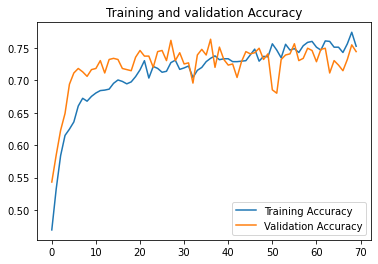

In [35]:
# Plotting of Training-Validation Accuracy of upgraded model
accuracy = train1.history['accuracy']
val_accuracy = train1.history['val_accuracy']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'Training Accuracy' )
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and validation Accuracy')


Text(0.5, 1.0, 'Training and Validation Loss')

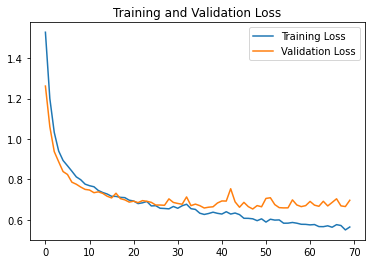

In [36]:
# Plotting of Training-Validation Loss of upgraded model
loss = train1.history['loss']
val_loss = train1.history['val_loss']

plt.plot(epochs, loss, label = 'Training Loss' )
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [37]:
# Performance of our upgraded model
scores = model1.evaluate(X_test_sc1, Y_test1, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6966260075569153
Accuracy: 0.7439446449279785


In [38]:
# Classification report of upgraded model
Y_pred1 = model1.predict(X_test_sc1)
Y_pred1=np.argmax(Y_pred1, axis=1)
Y_test1=np.argmax(Y_test1, axis=1)
print("Test Classification Report",classification_report(Y_test1,Y_pred1))

Test Classification Report               precision    recall  f1-score   support

           0       0.94      1.00      0.97       185
           1       0.00      0.00      0.00        12
           2       0.73      0.69      0.71       169
           3       0.66      0.61      0.64       161
           4       0.42      0.64      0.51        45
           5       0.00      0.00      0.00         6

    accuracy                           0.74       578
   macro avg       0.46      0.49      0.47       578
weighted avg       0.73      0.74      0.74       578



The accuracy of the new architecture has been improved by a pretty much margin. Along with loss being depreciated by a good extent in comparison with the earlier model.